# Chapter 9. Customer lifetime value

Understanding what the customer lifetime value (CLV) is for individual customers can help marketers justify their marketing budget, as well as target potential high-value customers

## 9.1 CLV

In marketing, the CLV is one of the key metrics to have and monitor. The CLV measures customers' total worth to the business over the course of their lifetime relationship with the company. This metric is especially important to keep track of for acquiring new customers. It is generally more expensive to acquire new customers than to keep existing customers, so knowing the lifetime value and the costs associated with acquiring new customers is essential in order to build marketing strategies with a positive ROI. For example, if the average CLV of your customer is 100 and it only cost 10 to acquire a new customer, then your business will be generating more revenue as you acquire new customers 

However, if it costs 150 to acquire a new customer and the average CLV of your customer is still 100, then you will be losing money for each acquisition. Simply put, if your marketing spend for new customer acquisition exceeds the CLV, you will be losing money for each acquisition, and it is better to just work with the existing customers 

There are multiple ways to calculate CLV. One way is to find the customer's average purchase amount, purchase frequency, and lifetime span and do a simple calculation to get the CLV. For example, think of a hypothetical case, where a customer's average purchase amount is 100 and he or she makes purchases five times every month on average. Then this customer's average value per month is 500, which is simply multiplying the average purchase amount with the average purchase frequency. Now, we need to know this customer's lifetime span. One way to estimate a customer's lifetime span is to look at the average monthly churn rate, which is the percentage of customers leaving and terminating the relationship with your business. You can estimate a customer's lifetime span by dividing one by the churn rate. Assuming 5% of the churn rate in our hypothetical case, the estimated customer's lifetime span is 20 years. Given the customer's average value per month of 500 and lifetime span of 20 years, the CLV of this customer turns out to be 120,000. This final CLV amount is calculated by multiplying 500, the average value per month, by 12 months and the lifetime span of 20 years

Because we do not typically know the lifetime span of customers, we often try to estimate CLV over the course of a certain period. It can be done by estimating a customer's 12-month CLV, 24-month CLV, or can also be a 3- month CLV

CLV can also be estimated through building predictive models. Using machine learning algorithms and customers' purchase history data, we can build machine learning models that predict customers' CLV over the course of a certain period

## 9.2 Evaluating regression models

**Mean squared error (MSE)**: MSE measures the average of the squared errors, where the errors are the differences between the predicted and actual values

**Median absolute error (MAE)**: Less sensitive to outliers and more robust. 

**R-squared**: The percentage of the explained variability of the target variable by the regression model, Explained Variation / Total Variation

## 9.3 Predicting the 3 month CLV with python

In [12]:
import pandas as pd
df = pd.read_excel('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/Online Retail.xlsx', sheet_name = 'Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data cleanup

In [13]:
# 1.Handling negative quantity 
df = df.loc[df['Quantity'] > 0]

# 2.Dropping NaN records
df = df[pd.notnull(df['CustomerID'])]

# 3.Handling incomplete data
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# 4.Total sales value
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [14]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales':sum,
    'InvoiceDate':max
})
orders_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

### Data analysis

In [15]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [16]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})
summary_df.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

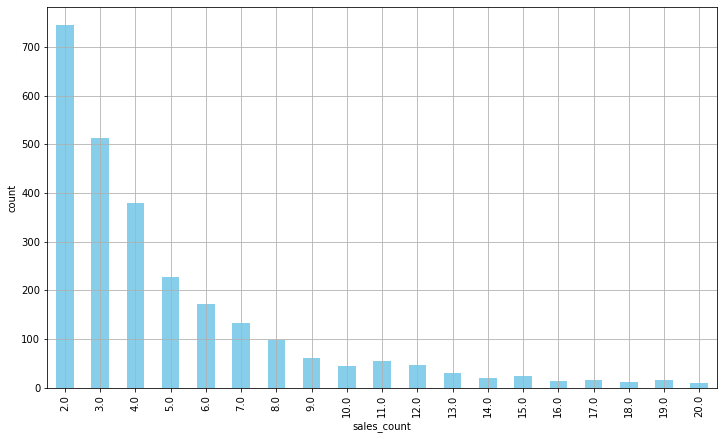

In [17]:
import matplotlib.pyplot as plt

summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar',
    color='skyblue',
    figsize=(12,7),
    grid=True
)
ax.set_ylabel('count')
plt.show()

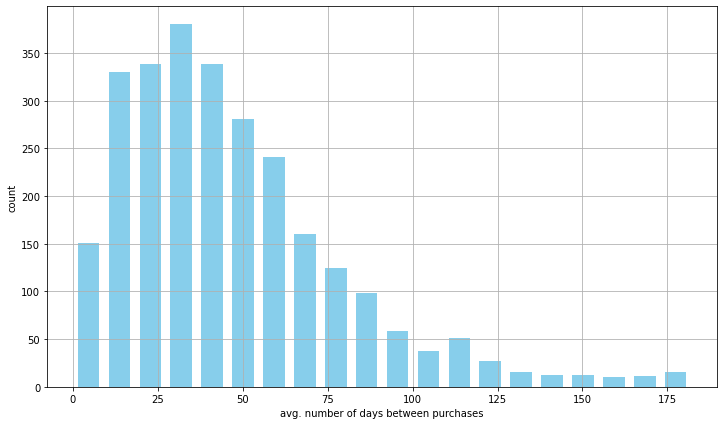

In [18]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)
ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()

### Predicting the 3 month CLV

Slice the data into chunks of 3 months and take the last 3 months' data as the target for predictions and the rest at the features

#### Data preparation

In [19]:
clv_freq = '3M'

data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key = 'InvoiceDate', freq = clv_freq)
]).agg({
    'Sales':[sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


Aggregate data that has purchase information for each customer for every 3 months 

In [21]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
6,12348.0,2010-12-31,892.80,892.800,1.0,M_5
7,12348.0,2011-03-31,227.44,227.440,1.0,M_4
8,12348.0,2011-06-30,367.00,367.000,1.0,M_3
9,12348.0,2011-09-30,310.00,310.000,1.0,M_2


Use the last 3 months as the target variable and the rest as the features, meaning we are going to train a machine learning model that predicts the last 3 months' customer value with the rest of the data

In [22]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'],
    values = ['sales_sum', 'sales_avg', 'sales_count'],
    columns = 'M',
    index = 'CustomerID'
)
features_df.columns = ['_'.join(col) for col in features_df.columns]
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
12353.0,NaN,89.000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,89.00,NaN,NaN
12354.0,NaN,1079.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1079.40,NaN,NaN
12355.0,NaN,459.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,459.40,NaN,NaN
12356.0,NaN,481.460,2271.620,NaN,NaN,1.0,1.0,NaN,NaN,481.46,2271.62,NaN


In [23]:
features_df = features_df.fillna(0)
features_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00
18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00
18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00


In [40]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]
response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


Take the last 3 month period, the M_1 group, as the target variable. The target column will be sales_sum, as we want to predict the next 3 month customer value, which is the total purchase amount that a given customer is likely to make in the next 

In [42]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)
sample_set_df = sample_set_df.fillna(0)
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73
NaN,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00,12353.0,0.00
NaN,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00,12354.0,0.00
NaN,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00,12355.0,0.00
20.0,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,0.00,481.46,2271.62,0.00,12356.0,58.35
NaN,484.86,0.000,0.000,0.00,1.0,0.0,0.0,0.0,484.86,0.00,0.00,0.00,12358.0,0.00


In [43]:
sample_set_df['CLV_'+clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

#### Linear regression

In [45]:
from sklearn.model_selection import train_test_split 

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features],
    sample_set_df[target_var],
    test_size = 0.3
)

In [46]:
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg_fit.intercept_

-19.122159602350393

In [48]:
reg_fit.coef_

array([ 3.78323326e-01, -2.44424362e-01,  8.69338125e-02, -1.17911153e+00,
        7.17222412e+01,  2.54581191e+01,  1.50752896e+01, -1.44339797e+02,
        2.79246949e-01,  2.86834897e-01, -5.29619838e-02,  1.30356412e+00])

In [49]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,sales_avg_M_2,0.378323
1,sales_avg_M_3,-0.244424
2,sales_avg_M_4,0.086934
3,sales_avg_M_5,-1.179112
4,sales_count_M_2,71.722241
5,sales_count_M_3,25.458119
6,sales_count_M_4,15.075290
7,sales_count_M_5,-144.339797
8,sales_sum_M_2,0.279247
9,sales_sum_M_3,0.286835


#### Evaluating regression model performance

In [50]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [53]:
from sklearn.metrics import r2_score, median_absolute_error

In [54]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7046
Out-of-Sample R-Squared: 0.7109


In [55]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 189.8021
Out-of-Sample MSE: 184.8464


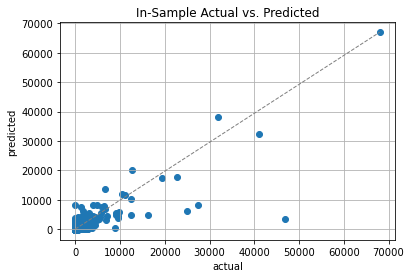

In [56]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

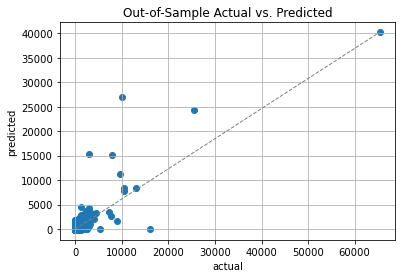

In [57]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

## 9.4 Predicting the 3 month CLV with r